import relevant class(es) from w5,
make a cluster,
implement periodicity (minimum image convention) from article from w5,
move the atomic cluster around and check that you get the same energy

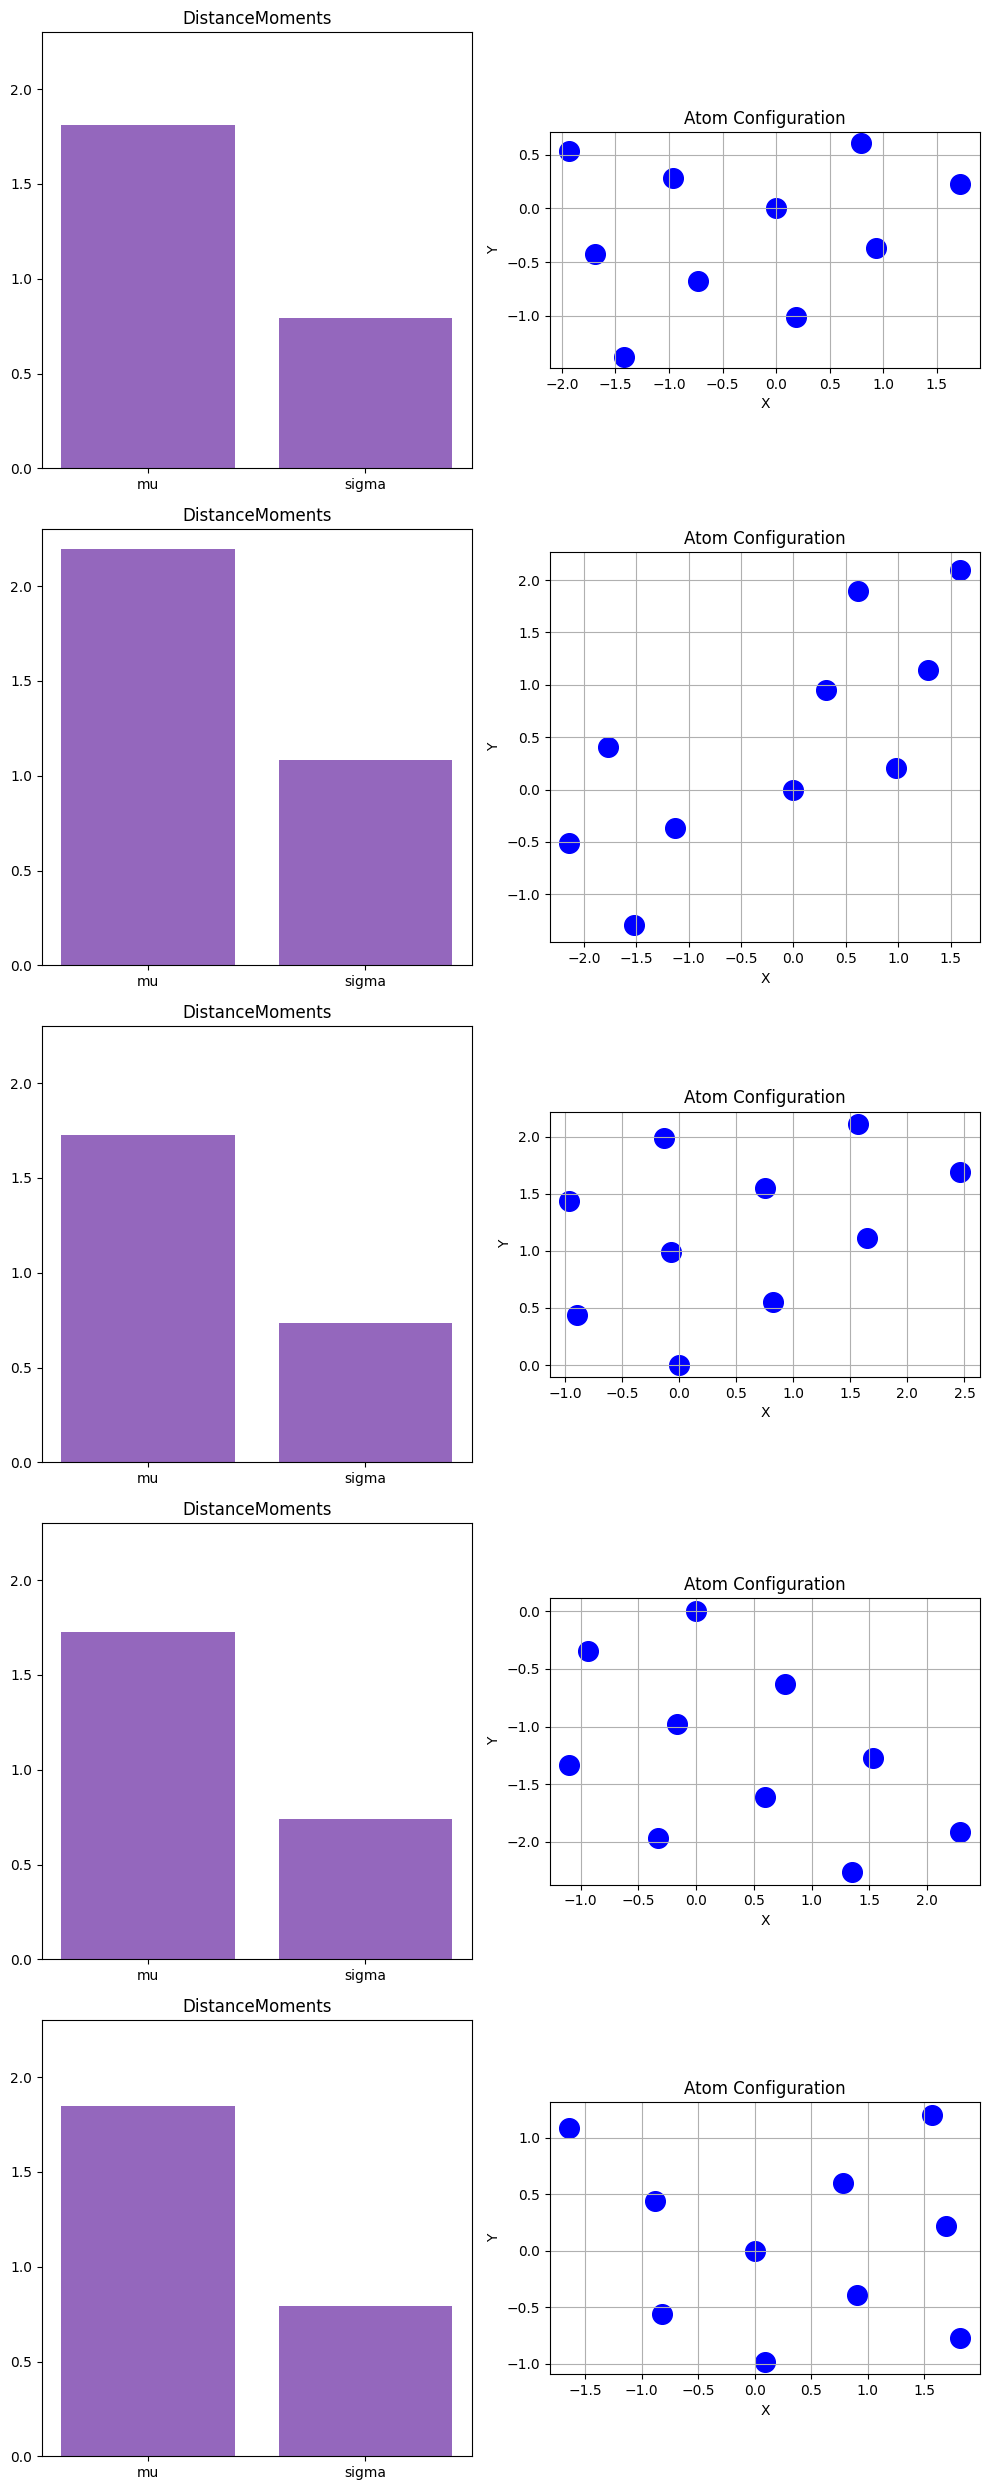

//wsl.localhost/Ubuntu\home/justusperthes/repos/comPhys/Comphy/w4\clustering.py:125: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


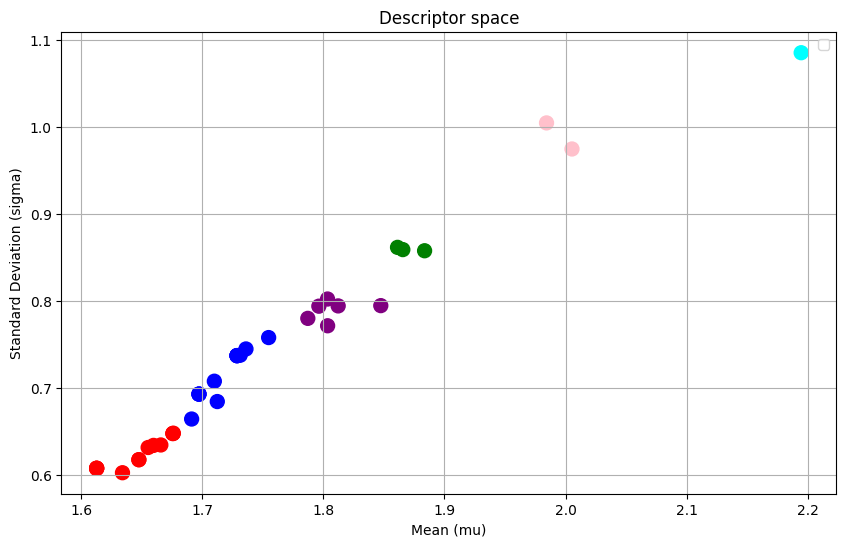

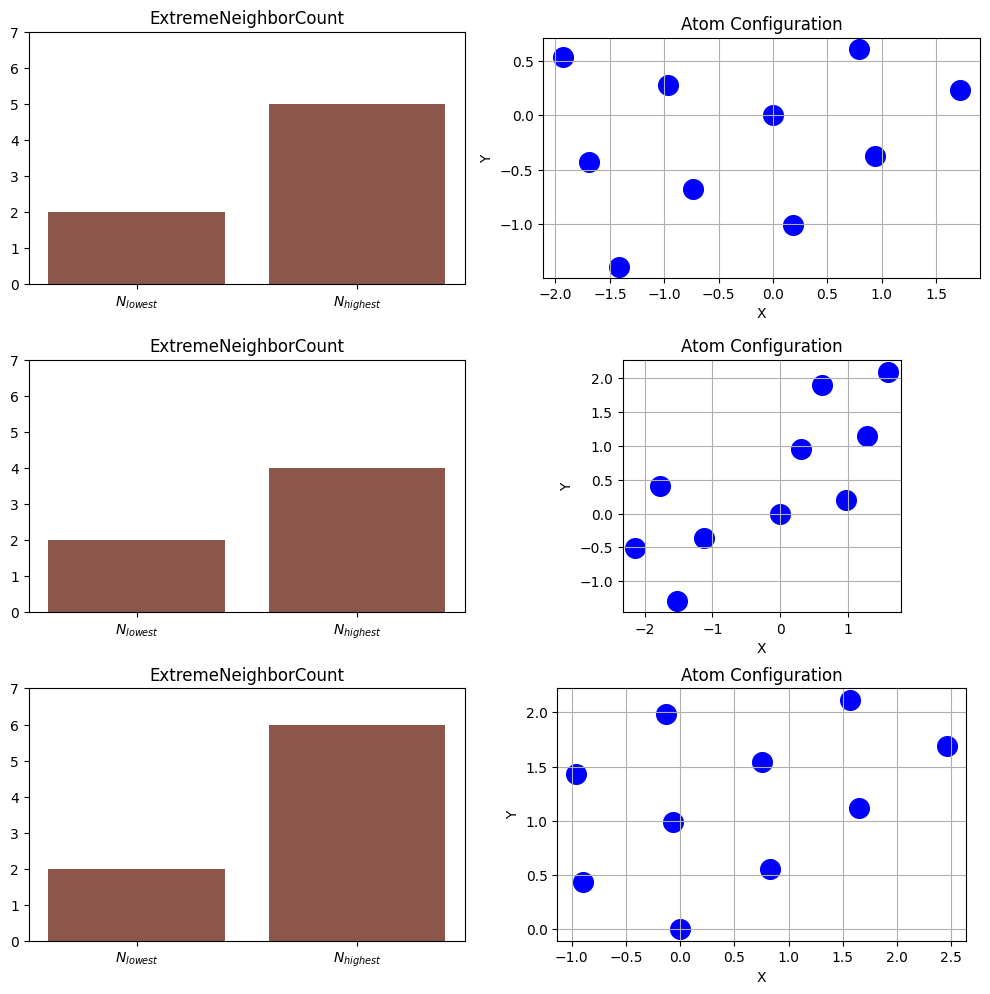

[]
['purple', 'cyan', 'blue', 'blue', 'purple', 'blue', 'red', 'blue', 'red', 'purple', 'blue', 'blue', 'red', 'purple', 'red', 'red', 'blue', 'red', 'green', 'red', 'red', 'red', 'pink', 'blue', 'red', 'red', 'red', 'blue', 'purple', 'green', 'blue', 'blue', 'green', 'purple', 'blue', 'blue', 'red', 'pink']


//wsl.localhost/Ubuntu\home/justusperthes/repos/comPhys/Comphy/w4\clustering.py:254: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


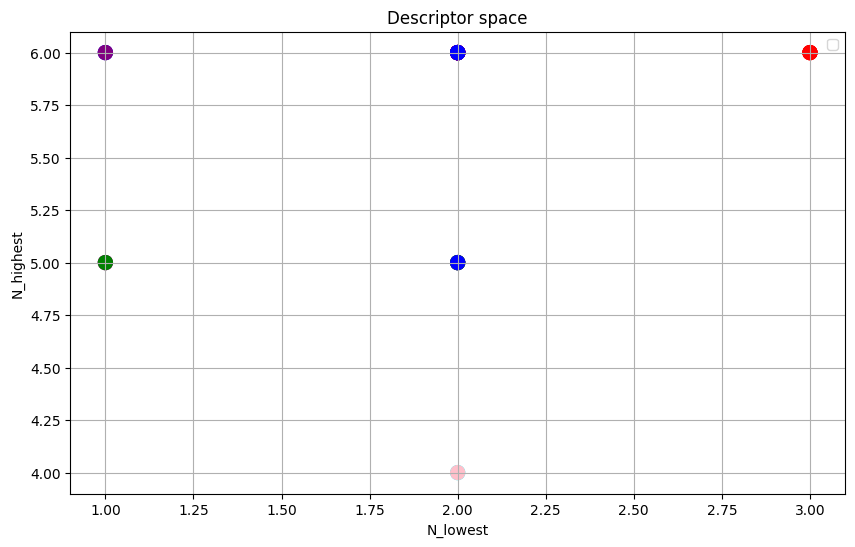

NameError: name 'clusters' is not defined

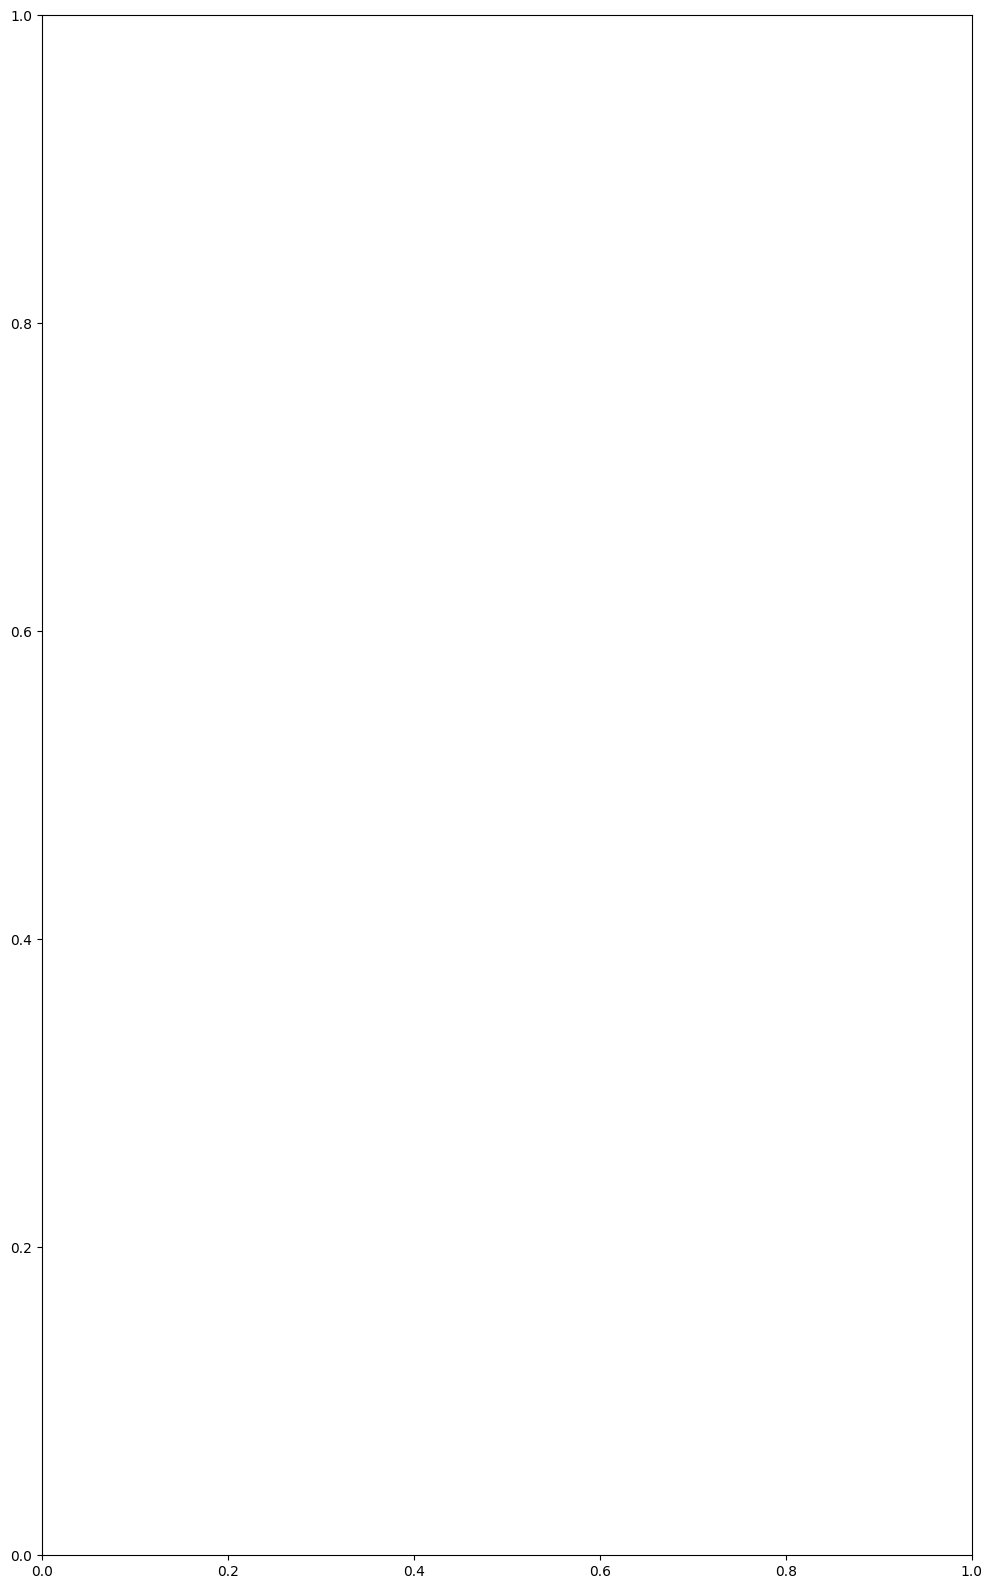

In [129]:
from clustering import HelloWorld

In [ ]:
import os
print(os.listdir('//wsl.localhost/Ubuntu/home/justusperthes/repos/comPhys/Comphy/w4'))


['lj10clusters.txt', 'clustering.ipynb', 'Templates_19_20_21_23']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.spatial.distance import pdist

class Atomic_Cluster:
    
    def __init__(self, data, color='C4'):
        # Check if data is a file path or an array
        if isinstance(data, str):
            self.positions = self.load_data(data)
        elif isinstance(data, np.ndarray):
            self.positions = data.reshape(-1, data.shape[1] // 2, 2)
        else:
            raise ValueError("Input must be a file path or a numpy array")
        
        self.color = color

    def load_data(self, data_file):
        # Load and reshape position data
        pos_flat = np.loadtxt(data_file)
        return pos_flat.reshape(-1, pos_flat.shape[1] // 2, 2)

    # Calculate mean and standard deviation of pairwise distances
    def descriptor(self, pos):
        all_distances = pdist(pos)
        mean = np.mean(all_distances)
        std = np.std(all_distances)
        return np.array([mean, std])
    
    # Draw both the atom configuration and the box
    def draw(self, pos, ax, box_size=10.0):
        # Scatter plot of atom positions (atom configuration)
        ax.scatter(pos[:, 0], pos[:, 1], color=self.color, s=200, label="Atoms")
        
        # Set limits to be slightly bigger than the box (2 units bigger on each side)
        ax.set_xlim(-1, box_size + 1)
        ax.set_ylim(-1, box_size + 1)
        
        # Draw the edges of the box
        rect = Rectangle((0, 0), box_size, box_size, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Set plot properties
        ax.set_title("Atom Configuration with Box Boundary")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_aspect('equal')
        ax.grid(True)

    def plot_clusters(self, n_clusters=1, box_size=10.0):
        n_cols = 1  # Each cluster will use one column
        n_rows = n_clusters  # Number of clusters

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_clusters))

        # If there's only one cluster, axes will not be an array
        if n_clusters == 1:
            axes = [axes]  # Make it iterable

        for i in range(n_clusters):
            ax_scatter = axes[i]  # Access the axis
            self.draw(self.positions[i], ax_scatter, box_size=box_size)

        plt.tight_layout()
        plt.show()


hellow, mamain


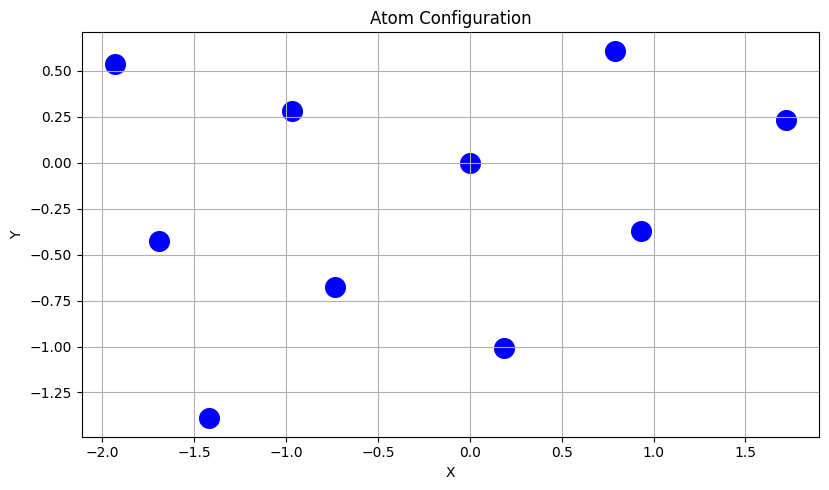

In [ ]:
# extention of the relevant classes from w5 to incorporate periodicity

class Periodicity(Atomic_Cluster):
    ###
    def hellow_man(self):
        print("hellow, mamain")


data_file = 'lj10clusters.txt'  # Replace with your actual data file path if necessary
period = Periodicity(data_file)

period.hellow_man()

n_clusters = 1
period.plot_clusters(n_clusters)

In [ ]:
from scipy.spatial.distance import pdist,squareform

class PeriodicLennardJones():
    def __init__(self,eps=1):
        self.eps = eps
        
    def _V(self,r):
        return self.eps * (r**(-12) - 2 * r**(-6))

    def _dV_dr(self, r):
        return    self.eps * (-12 * r**(-13) + 12 * r**(-7) )
    
    def _pairwise_distance_matrix(self, pos, box):
        diff = pos[np.newaxis, :, :] - pos[:, np.newaxis, :]
        for dim in range(2):  # Loop over x and y dimensions and get smallest component
            diff[..., dim] -= np.rint(diff[..., dim] / box[dim, dim]) * box[dim, dim]
        return diff
    
    def energy(self, pos, box):
        diff = self._pairwise_distance_matrix(pos, box)
        r = np.sqrt(np.sum(diff**2, axis=-1))
        return np.sum(self._V(squareform(r)))
    
    def forces(self, pos, box):
        diff = self._pairwise_distance_matrix(pos, box)
        r = np.sqrt(np.sum(diff**2, axis=-1))
        np.fill_diagonal(r, 1000)
        force_magnitude = self._dV_dr(r)
        forces = np.sum(force_magnitude[..., np.newaxis] * diff / \
                        r[..., np.newaxis], axis=1)
        return forces

In [ ]:
import numpy as np

# Define a 2D box with size 10x10
box = np.array([[10.0, 0.0], [0.0, 10.0]])

# Define positions of 4 particles randomly within the box
pos = np.array([
    [1.0, 1.0],
    [3.0, 4.0],
    [5.0, 5.0],
    [7.0, 2.0]
])

# Create an instance of the PeriodicLennardJones class
lj = PeriodicLennardJones(eps=1)

# Compute the potential energy of the system
energy = lj.energy(pos, box)
print(f"Potential Energy: {energy}")

# Compute the forces acting on each particle
forces = lj.forces(pos, box)
print("Forces:")
print(forces)


Potential Energy: -0.018474310609394903
Forces:
[[ 0.00031111  0.00144931]
 [ 0.03755284  0.01763653]
 [-0.03729865 -0.02035206]
 [-0.0005653   0.00126622]]


In [ ]:
import matplotlib as plt

class PeriodicSystem():
    
    def __init__(self, calc, N=None, pos=None, static=None, box=None,
                descriptor_method=None, kT=0.15):
        self.calc = calc
        self.box = box
        assert (N is not None and pos is None) or \
               (N is None and pos is not None), 'You must specify either N or pos'
        if pos is not None:
            self.set_positions(np.array(pos)*1.)
            self.N = len(pos)
        else:
            self.N = N
            pos = np.random.rand(N,2)
            pos[:,0] *= self.box[0,0]
            pos[:,1] *= self.box[1,1]
            self.set_positions(pos)
        if static is not None:
            assert len(static) == self.N, 'static must be N long'
            self.static = static
        else:
            self.static = [False for _ in range(self.N)]
        self.filter = np.array([self.static,self.static]).T
        self.indices_dynamic_atoms = \
                            [i for i,static in enumerate(self.static) if not static]
        self.plot_artists = {}
        self.descriptor_method = descriptor_method
        self.kT = kT
        self.velocities = np.zeros(self.pos.shape)
        
    def copy(self):
        return PeriodicSystem(self.calc, pos=self.pos.copy(), static=self.static.copy(),
                              box=self.box.copy())

    def stress(self, delta=1e-4):
        return self.calc.stress(self.pos, self.box, delta=delta)
    
    def pressure(self, delta=1e-4):
        return self.calc.pressure(self.pos, self.box, delta=delta)
    
    @property
    def kinetic_energy(self):
        return 0.5 * np.sum(self.velocities**2)

    def set_velocities(self,velocities):
        self.velocities = np.where(self.filter,0,velocities)

    def get_velocities(self):
        return self.velocities.copy()
    
    def energy_title(self):
        return f'Ek={self.kinetic_energy:.1f} ' +\
               f'Ep={self.potential_energy:.1f} ' + \
               f'E={self.potential_energy + self.kinetic_energy:.1f}'
    
    @property
    def potential_energy(self):
        return self.calc.energy(self.pos,self.box)
        
    def forces(self):
        forces = self.calc.forces(self.pos,self.box)
        return np.where(self.filter,0,forces)
    
    def set_positions(self,pos):
        pos[:,0] = pos[:,0] % self.box[0,0]
        pos[:,1] = pos[:,1] % self.box[1,1]
        self.pos = pos
        
    def get_scaled_positions(self):
        return self.pos @ np.linalg.inv(self.box).T
        
    def get_positions(self):
        return self.pos.copy()
        
    def draw_periodic(self,ax,size=200):
        ax.scatter(self.pos[:,0],self.pos[:,1],s=size)
        for i, (x,y) in enumerate(self.pos):
            ax.text(x,y,str(i),ha='center',va='center',color='w')
        deltas = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)]
        for dx,dy in deltas:
            ax.scatter(self.pos[:,0]+dx*self.box[0,0],self.pos[:,1]+dy*self.box[1,1],
                       s=size,facecolor='w',edgecolor='C0')
    def draw_cell(self,ax):        
        ax.plot(np.array([0,self.box[0,0],self.box[0,0],0,0]),
                np.array([0,0,self.box[1,1],self.box[1,1],0]))
        
    @property
    def descriptor(self):
        return self.descriptor_method.descriptor(self.pos)

    def energy_title(self):
        return f'Ep={self.potential_energy:.1f}'
    
    def draw(self,ax,size=100,alpha=1,force_draw=False,edge=False,color='C0',
             energy_title=True):
        if self.plot_artists.get(ax,None) is None or force_draw or edge:
            colors = ['C1' if s else color for s in self.static]
            facecolors = [plt.to_rgba(c,alpha) for c in colors]
            if edge:
                edgecolors = (0,0,0,1)
                self.plot_artists[ax] = ax.scatter(self.pos[:,0],self.pos[:,1],
                                               s=size,facecolors=facecolors,
                                                  edgecolors=edgecolors,
                                                  linewidth=2)
            else:
                edgecolors = (0,0,0,0.5)
                self.plot_artists[ax] = ax.scatter(self.pos[:,0],self.pos[:,1],
                                                   s=size,facecolors=facecolors,
                                                  edgecolors=edgecolors,)
        else:
            self.plot_artists[ax].set_offsets(self.pos)
        if energy_title:
            ax.set_title(self.energy_title())

    def draw_descriptor(self,ax):
        self.descriptor_method.draw(self.pos,ax)

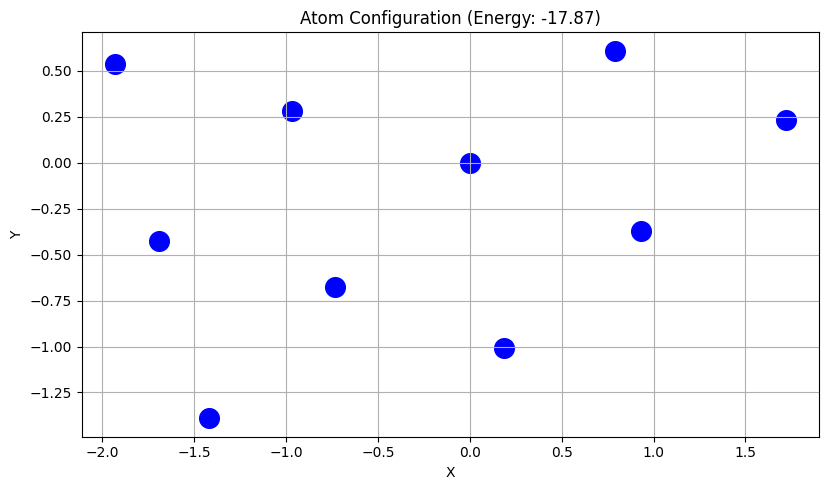

In [ ]:
# Usage example with the provided data file and a 10x10 box
data_file = 'lj10clusters.txt'
box = np.array([[10.0, 0.0], [0.0, 10.0]])

# Create instances of both classes
atomic_cluster = Atomic_Cluster(data_file)
lj = PeriodicLennardJones(eps=1)

# Define a function that computes the energy for each cluster and plots them
def plot_clusters_with_energy(atomic_cluster, lj, n_clusters, box):
    n_cols = 1
    n_rows = n_clusters
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_clusters))

    # If there's only one cluster, axes will not be an array, so make it iterable
    if n_clusters == 1:
        axes = [axes]

    for i in range(n_clusters):
        pos = atomic_cluster.positions[i]
        energy = lj.energy(pos, box)
        ax_scatter = axes[i]  # Access the axis
        atomic_cluster.draw(pos, ax_scatter)
        ax_scatter.set_title(f"Atom Configuration (Energy: {energy:.2f})")

    plt.tight_layout()
    plt.show()

# Assume we want to plot all clusters (e.g., 10 clusters)
n_clusters = 1
plot_clusters_with_energy(atomic_cluster, lj, n_clusters, box)

Initial Energy: -17.87
Shifted Energy: -17.87


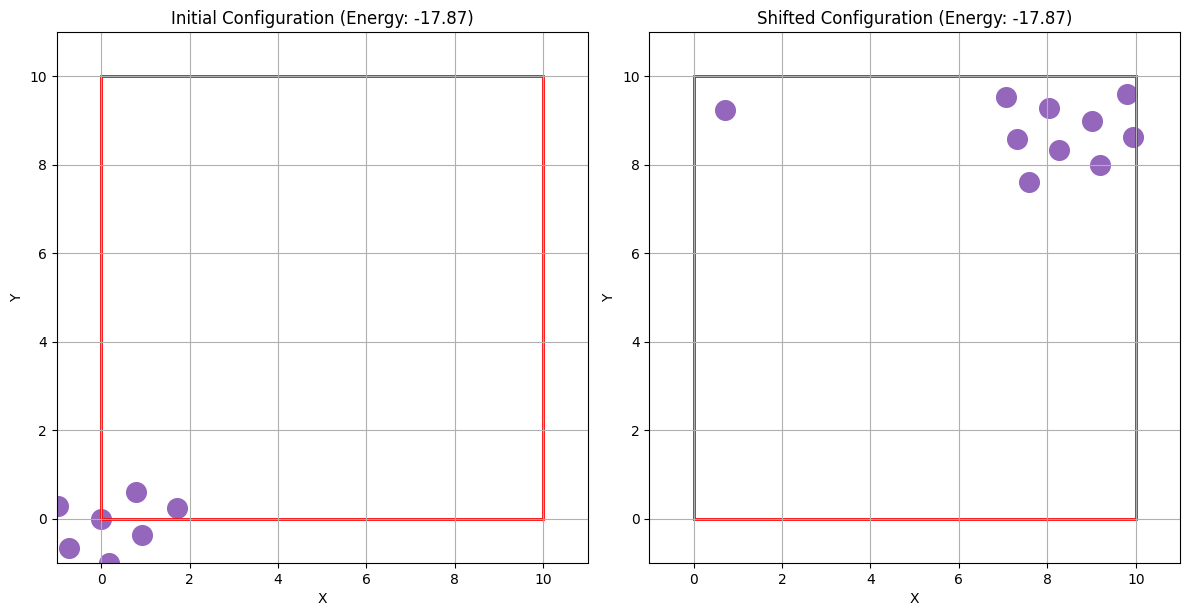

The energies are the same, showing that shifting the cluster does not change the energy due to periodic boundary conditions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Usage example with the provided data file and a 10x10 box
data_file = 'lj10clusters.txt'
box = np.array([[10.0, 0.0], [0.0, 10.0]])

# Create instances of both classes
atomic_cluster = Atomic_Cluster(data_file)
lj = PeriodicLennardJones(eps=1)

# Extract the first cluster
pos_initial = atomic_cluster.positions[0]

# Compute the initial energy
energy_initial = lj.energy(pos_initial, box)
print(f"Initial Energy: {energy_initial:.2f}")

# Shift the cluster to be very close to the box boundary, e.g., shift by 9 units
shift_vector = np.array([9.0, 9.0])
pos_shifted = pos_initial + shift_vector

# Apply periodic boundary conditions to wrap positions into the box
pos_shifted = pos_shifted % box[0, 0]

# Compute the energy after shifting
energy_shifted = lj.energy(pos_shifted, box)
print(f"Shifted Energy: {energy_shifted:.2f}")

# Plot both configurations for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial configuration
ax1 = axes[0]
atomic_cluster.draw(pos_initial, ax1)
ax1.set_title(f"Initial Configuration (Energy: {energy_initial:.2f})")

# Plot shifted configuration
ax2 = axes[1]
atomic_cluster.draw(pos_shifted, ax2)
ax2.set_title(f"Shifted Configuration (Energy: {energy_shifted:.2f})")

plt.tight_layout()
plt.show()

# Check if the energies are nearly identical
if np.isclose(energy_initial, energy_shifted):
    print("The energies are the same, showing that shifting the cluster does not change the energy due to periodic boundary conditions.")
else:
    print("The energies differ, which may indicate an issue with the periodic boundary condition handling.")


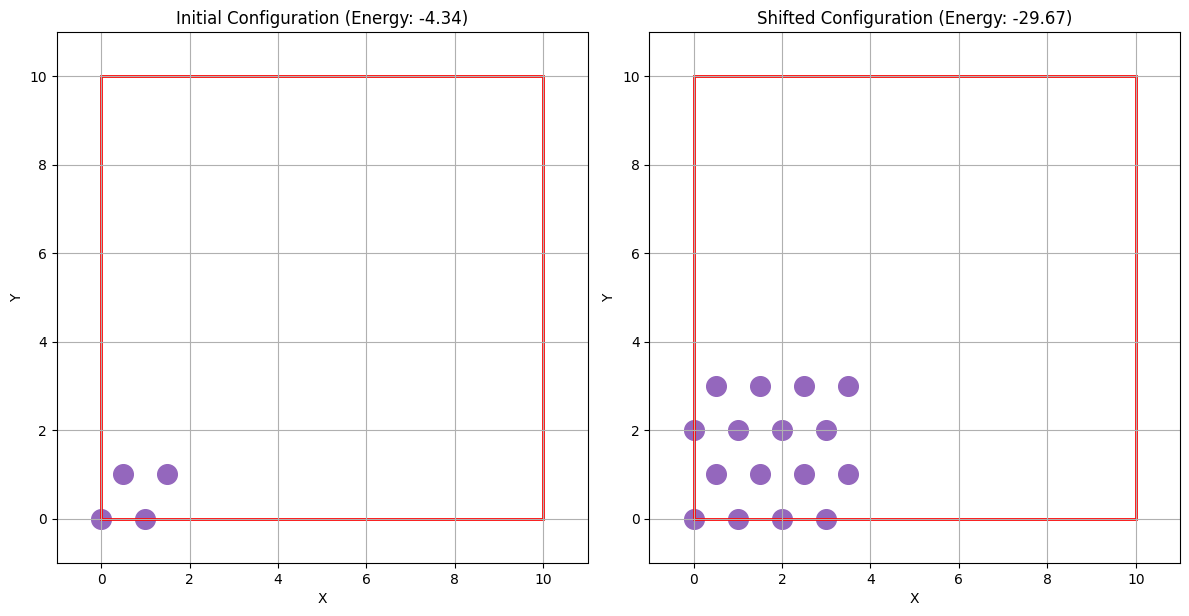

The energy is increased by a factor 6.831637131217758.


In [138]:
# Define a custom 2D atomic cluster
pos = np.array([
    [0.0, 0.0],
    [1.0, 0.0],
    [0.5, 1.0],
    [1.5, 1.0]
])

# Define a 2D box with size 10x10
box = np.array([[10.0, 0.0], [0.0, 10.0]])

# Create an instance of the PeriodicLennardJones class
lj = PeriodicLennardJones(eps=1)

# Create an instance of the Atomic_Cluster class using the array directly
atomic_cluster = Atomic_Cluster(pos)

# Shift the position of the atomic cluster by moving it towards the edge of the box
shifted_pos1 = pos + np.array([2.0,0.0])
shifted_pos2 = pos + np.array([0.0,2.0])
shifted_pos3 = pos + np.array([2.0,2.0])
pos_extended = np.vstack([pos,shifted_pos1])
pos_extended = np.vstack([pos_extended,shifted_pos2])
pos_extended = np.vstack([pos_extended,shifted_pos3])

energy_initial = lj.energy(pos, box)

# Calculate the energy for the shifted configuration
energy_extended = lj.energy(pos_extended, box)

# Plot both configurations for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial configuration
ax1 = axes[0]
atomic_cluster.draw(pos, ax1, box_size=10.0)
ax1.set_title(f"Initial Configuration (Energy: {energy_initial:.2f})")

# Plot shifted configuration
ax2 = axes[1]
atomic_cluster.draw(pos_extended, ax2, box_size=10.0)
ax2.set_title(f"Shifted Configuration (Energy: {energy_extended:.2f})")

plt.tight_layout()
plt.show()

print(f"The energy is increased by a factor {energy_extended/energy_initial}.")


Why is the energy nost just increased by a factor 4?
...

In [131]:
class Extended_Cluster(Atomic_Cluster):
    def extend_cluster(self, factor, duplicates):
        """Extend the atomic cluster by creating duplicates in x and y directions."""
        extended_positions = []
        for dx in range(-duplicates, duplicates + 1):
            for dy in range(-duplicates, duplicates + 1):
                # Skip the original position
                if dx == 0 and dy == 0:
                    continue
                shifted_positions = self.positions + np.array([dx * factor, dy * factor])
                extended_positions.append(shifted_positions)
        # Combine the original positions with the extended ones
        return np.vstack([self.positions] + extended_positions)

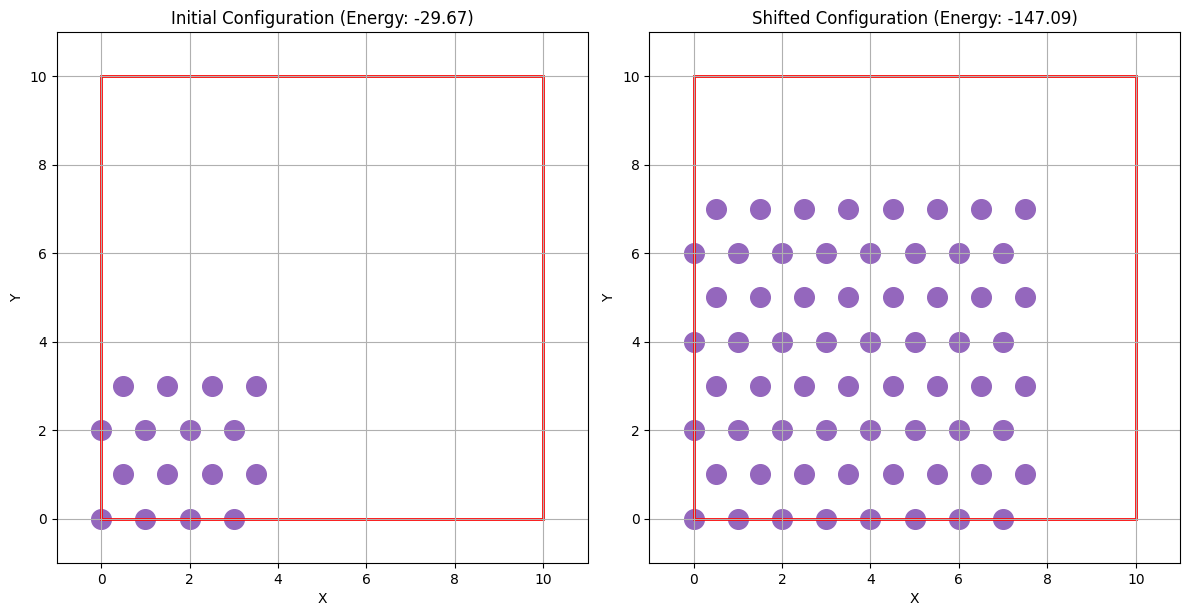

The energy is increased by a factor 4.957675594827604.\ The energy factor should approach 4.


In [139]:
# Define a custom 2D atomic cluster
pos_initial = pos_extended
pos = pos_extended

# Define a 2D box with size 10x10
box = np.array([[10.0, 0.0], [0.0, 10.0]])

# Create an instance of the PeriodicLennardJones class
lj = PeriodicLennardJones(eps=1)

# Create an instance of the Extended_Cluster class using the array directly
atomic_cluster = Extended_Cluster(pos)

# Shift the position of the atomic cluster by moving it towards the edge of the box
shifted_pos1 = pos + np.array([4.0,0.0])
shifted_pos2 = pos + np.array([0.0,4.0])
shifted_pos3 = pos + np.array([4.0,4.0])
pos_extended = np.vstack([pos,shifted_pos1])
pos_extended = np.vstack([pos_extended,shifted_pos2])
pos_extended = np.vstack([pos_extended,shifted_pos3])

energy_initial = lj.energy(pos_initial, box)

# Calculate the energy for the shifted configuration
energy_extended = lj.energy(pos_extended, box)

# Plot both configurations for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial configuration
ax1 = axes[0]
atomic_cluster.draw(pos, ax1, box_size=10.0)
ax1.set_title(f"Initial Configuration (Energy: {energy_initial:.2f})")

# Plot shifted configuration
ax2 = axes[1]
atomic_cluster.draw(pos_extended, ax2, box_size=10.0)
ax2.set_title(f"Shifted Configuration (Energy: {energy_extended:.2f})")

plt.tight_layout()
plt.show()

print(f"The energy is increased by a factor {energy_extended/energy_initial}. The energy factor should approach 4.")


ex 37: 5.1 Thermal expansion

ex 38: 6.1 Lennard-Jones-Gauss clusters

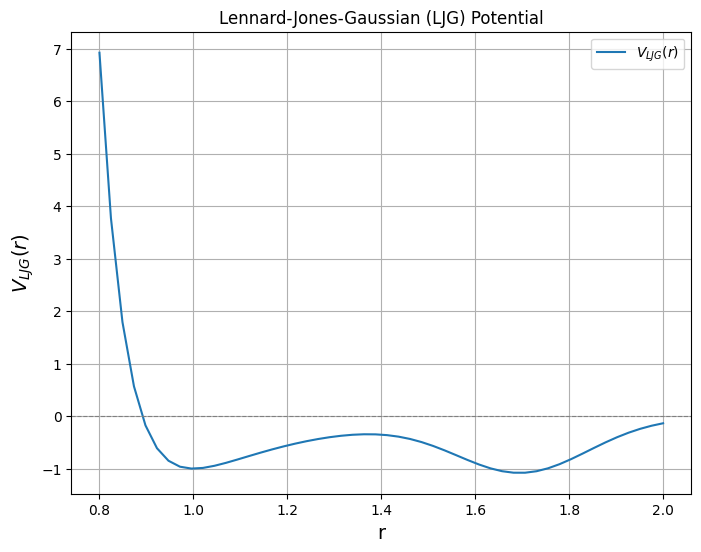

In [144]:
epsilon = 1 # depth of LJ minimum
r0 = 1 # location of LJ minimum
sigma_squared = 0.02 * r0**2 # width of Gaussian
r = np.linspace(0.8,2.0) # 

V_LJG = epsilon * ( (r0/r)**12 -2 * (r0/r)**6 - np.exp (- (r - 1.7 * r0)**2 / (2* sigma_squared)) )

plt.figure(figsize=(8, 6))
plt.plot(r, V_LJG, label=r'$V_{LJG}(r)$')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('r', fontsize=14)
plt.ylabel(r'$V_{LJG}(r)$', fontsize=14)
plt.title('Lennard-Jones-Gaussian (LJG) Potential')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
class LennardJonesGauss():
    def __init__(self,eps=1):
        self.eps = eps
        
    def _V(self,r):
        epsilon = self.eps
        return V_LJG
    

    def _dV_dr(self, r):
        epsilon = self.eps
        deriv_V = 42 #dV/dr
        return deriv_V

    
    def _pairwise_distance_matrix(self, pos, box):
        diff = pos[np.newaxis, :, :] - pos[:, np.newaxis, :]
        for dim in range(2):  # Loop over x and y dimensions and get smallest component
            diff[..., dim] -= np.rint(diff[..., dim] / box[dim, dim]) * box[dim, dim]
        return diff
    
    def energy(self, pos, box):
        diff = self._pairwise_distance_matrix(pos, box)
        r = np.sqrt(np.sum(diff**2, axis=-1))
        return np.sum(self._V(squareform(r)))
    
    def forces(self, pos, box):
        diff = self._pairwise_distance_matrix(pos, box)
        r = np.sqrt(np.sum(diff**2, axis=-1))
        np.fill_diagonal(r, 1000)
        force_magnitude = self._dV_dr(r)
        forces = np.sum(force_magnitude[..., np.newaxis] * diff / \
                        r[..., np.newaxis], axis=1)
        return forces

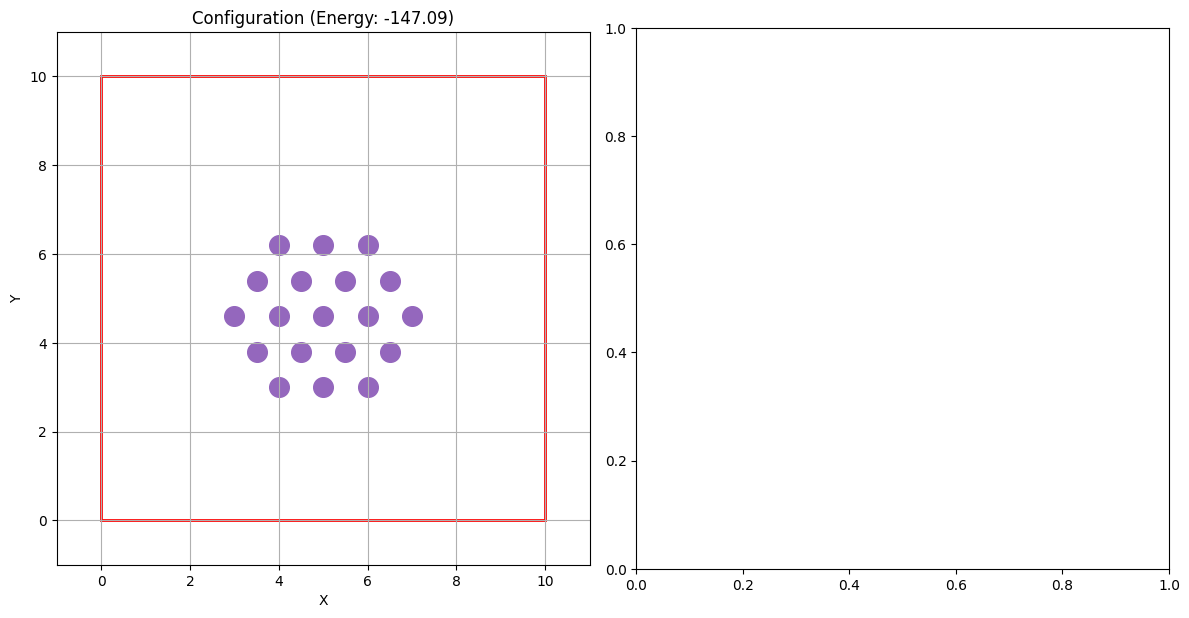

In [171]:
pos = np.array([
    [4, 3],  # Atom 1
    [5, 3],  # Atom 2
    [6, 3],  # Atom 3
    [3.5, 3.8],  # Atom 4
    [4.5, 3.8],  # Atom 5
    [5.5, 3.8],  # Atom 6
    [6.5, 3.8],  # Atom 7
    [3, 4.6],  # Atom 8
    [4, 4.6],  # Atom 9
    [5, 4.6],  # Atom 10
    [6, 4.6],  # Atom 11
    [7, 4.6],  # Atom 12
    [4.5, 5.4],  # Atom 13
    [5.5, 5.4],  # Atom 14
    [4, 6.2],  # Atom 15
    [5, 6.2],  # Atom 16
    [6, 6.2],  # Atom 17
    [3.5, 5.4],
    [6.5, 5.4]
])

box = np.array([[10.0, 0.0], [0.0, 10.0]])

lj = PeriodicLennardJones(eps=1)

energy  = lj.energy(pos_initial, box)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax1 = axes[0]
atomic_cluster.draw(pos, ax1, box_size=10.0)
ax1.set_title(f"Configuration (Energy: {energy:.2f})")

plt.tight_layout()
plt.show()
